# ML CUP 2022

## Support Vector Machine

This notebook creates two Support Vector Machine (SVM) models to generalize the problem of the ML cup 2022. It searches the best combination of hyperparameters performing a grid searches over a given range of values. Two different models are given as output in this phase, one for each target, and for both models there is a tuning phase based on the same hyperparameters. In the end of the notebook there is a comparison between the learning curves of KRR and SVR models.

Hyperparameters considered for the grid search:

1. kernel
2. C
3. epsilon
4. gamma (only for rbf and poly kernels)
5. degree (only for poly kernel)

Model selection performed using a cross validation.\
The model assessment phase is not included in this notebook.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math
import random

from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

import joblib

In [2]:
# choosing a seed for reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)

### Definition of the Mean Euclidean Distance

In [3]:
def my_mean_euclidean_distance(y_true, y_pred):
    points = len(y_true)
    tot_sum = 0
    for i in range (points):
        tot_sum += LA.norm(y_true[i] - y_pred[i])
    
    return tot_sum / points

In [4]:
mean_euclidean_distance = make_scorer(my_mean_euclidean_distance, greater_is_better=False)

### Loading data

In [5]:
colnames = ['id', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'target1', 'target2']
mlcup_tr = pd.read_csv("./dataset/ml_cup22/ML-CUP22-TR.csv", sep = ",", names=colnames)
mlcup_tr = mlcup_tr.iloc[1:, :]
mlcup_tr = mlcup_tr.drop('id', axis=1)

In [6]:
x_mlcup_tr = mlcup_tr.iloc[:, 0:9].values
y_mlcup_tr = mlcup_tr.iloc[:, 9:11].values

We used the function below to normalize our training set (both input and target) according to a min-max normalization

In [7]:
x_cols = len(x_mlcup_tr[0])

max_col_value_x = [None]*x_cols
max_vl = None

min_col_value_x = [None]*x_cols
min_vl = None

for i in range(x_cols):
    col = x_mlcup_tr[:, i]
    max_vl = np.amax(col)
    min_vl = np.amin(col)
    
    x_mlcup_tr[:, i] = (x_mlcup_tr[:, i] - min_vl) / (max_vl - min_vl)
    
    max_col_value_x[i] = max_vl
    min_col_value_x[i] = min_vl

In [8]:
y1_mlcup_tr = y_mlcup_tr[:, 0]
y2_mlcup_tr = y_mlcup_tr[:, 1]

### Grid search for target 1
#### rbf kernel

In [9]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = [
    {'gamma': gamma_range, 'C': C_range, 'epsilon': epsilon_range},
    {'gamma': ['auto', 'scale'], 'C': C_range, 'epsilon': epsilon_range}
]

grid = GridSearchCV(
    SVR(kernel = 'rbf'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1
)

grid.fit(x_mlcup_tr, y1_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 16.387032963983955, 'epsilon': 0.18620968289033768, 'gamma': 1.259921049894872} with a score of -0.80710


In [10]:
rbf_classifier_1 = grid.best_estimator_

### linear kernel

In [11]:
C_range = np.logspace(-2, 10, 100, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = dict(
    C = C_range,
    epsilon = epsilon_range
)

grid = GridSearchCV(
    SVR(kernel = 'linear'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1 
)

grid.fit(x_mlcup_tr, y1_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 2.2214707591454514, 'epsilon': 1.0717734625362931} with a score of -1.20211


In [12]:
linear_classifier_1 = grid.best_estimator_

### polynomial kernel

In [13]:
degree_range = np.arange(2, 5, 1)
C_range = np.logspace(-9, 5, 10, base = 2)
gamma_range = np.logspace(-9, 1, 10, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = [
    {'gamma': gamma_range, 'C': C_range, 'epsilon': epsilon_range, 'degree': degree_range},
    {'gamma': ['auto', 'scale'], 'C': C_range, 'epsilon': epsilon_range, 'degree': degree_range}
]

grid = GridSearchCV(
    SVR(kernel = 'poly'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1
)

grid.fit(x_mlcup_tr, y1_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 3.7034988491491627, 'degree': 2, 'epsilon': 0.18620968289033768, 'gamma': 'scale'} with a score of -1.13341


In [14]:
poly_classifier_1 = grid.best_estimator_

### Grid search for target 2
#### rbf kernel

In [15]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = [
    {'gamma': gamma_range, 'C': C_range, 'epsilon': epsilon_range},
    {'gamma': ['auto', 'scale'], 'C': C_range, 'epsilon': epsilon_range}
]

grid = GridSearchCV(
    SVR(kernel = 'rbf'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1
)

grid.fit(x_mlcup_tr, y2_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1.8616111078399704, 'epsilon': 0.0009765625, 'gamma': 4.507769644929328} with a score of -1.02988


In [16]:
rbf_classifier_2 = grid.best_estimator_

#### linear kernel

In [17]:
C_range = np.logspace(-2, 10, 100, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = dict(
    C = C_range,
    epsilon = epsilon_range
)

grid = GridSearchCV(
    SVR(kernel = 'linear'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1
)

grid.fit(x_mlcup_tr, y2_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 4.0, 'epsilon': 0.18620968289033768} with a score of -1.53101


In [18]:
linear_classifier_2 = grid.best_estimator_

#### polynomial kernel

In [19]:
degree_range = np.arange(2, 5, 1)
C_range = np.logspace(-9, 5, 10, base = 2)
gamma_range = np.logspace(-9, 1, 10, base = 2)
epsilon_range = np.logspace(-10, 0.1, 5, base = 2)

param_grid = [
    {'gamma': gamma_range, 'C': C_range, 'epsilon': epsilon_range, 'degree': degree_range},
    {'gamma': ['auto', 'scale'], 'C': C_range, 'epsilon': epsilon_range, 'degree': degree_range}
]

grid = GridSearchCV(
    SVR(kernel = 'poly'),
    param_grid = param_grid,
    cv = 4,
    scoring = mean_euclidean_distance,
    n_jobs = -1
)

grid.fit(x_mlcup_tr, y2_mlcup_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1.2599210498948736, 'degree': 2, 'epsilon': 0.03235202887004304, 'gamma': 'scale'} with a score of -1.36317


In [20]:
poly_classifier_2 = grid.best_estimator_

## Model selection

Since the best results are given by the Support Vector Machine classifier with the rbf kernel both on the first and second target, we choose these two models.

In [21]:
joblib.dump(rbf_classifier_1, './results/ml_cup/SVM/rbf_classifier_1.z')
joblib.dump(rbf_classifier_2, './results/ml_cup/SVM/rbf_classifier_2.z')

['./results/ml_cup/SVM/rbf_classifier_2.z']

### MEE on both targets on the training set

In [22]:
svr1 = joblib.load('./results/ml_cup/SVM/rbf_classifier_1.z')
svr2 = joblib.load('./results/ml_cup/SVM/rbf_classifier_2.z')

In [23]:
pred_label_svr_1 = svr1.predict(x_mlcup_tr)
pred_label_svr_2 = svr2.predict(x_mlcup_tr)
pred_label_svr = np.vstack((pred_label_svr_1, pred_label_svr_2)).T

In [24]:
# Mean euclidean distance
points = x_mlcup_tr.shape[0]
tot_sum = 0
for i in range (points):
    tot_sum += math.sqrt(math.pow((x_mlcup_tr[i][0] - pred_label_svr[i][0]), 2)
                         + math.pow((x_mlcup_tr[i][1] - pred_label_svr[i][1]), 2))
    
print('MEE on the training set:', tot_sum / points)

MEE on the training set: 29.699317560421463


### Comparison between SVM and KRR

In [25]:
from sklearn.model_selection import learning_curve

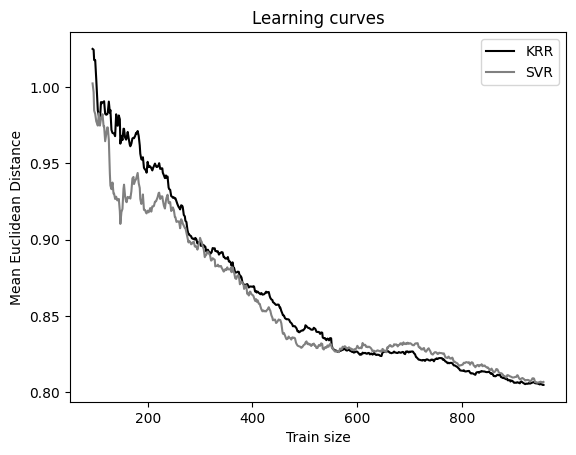

In [26]:
plt.figure()

svr = joblib.load('./results/ml_cup/SVM/rbf_classifier_1.z')
kr = joblib.load('./results/ml_cup/KRR/rbf_krr_1.z')
train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    x_mlcup_tr,
    y1_mlcup_tr,
    train_sizes = np.linspace(0.1, 1, 500),
    scoring = mean_euclidean_distance,
    cv = 5,
)
train_sizes_abs, train_scores_kr, test_scores_kr = learning_curve(
    kr,
    x_mlcup_tr,
    y1_mlcup_tr,
    train_sizes = np.linspace(0.1, 1, 500),
    scoring = mean_euclidean_distance,
    cv = 5,
)

plt.plot(train_sizes, -test_scores_kr.mean(1), color="black", label="KRR")
plt.plot(train_sizes, -test_scores_svr.mean(1), color="grey", label="SVR")
plt.xlabel("Train size")
plt.ylabel("Mean Euclidean Distance")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()

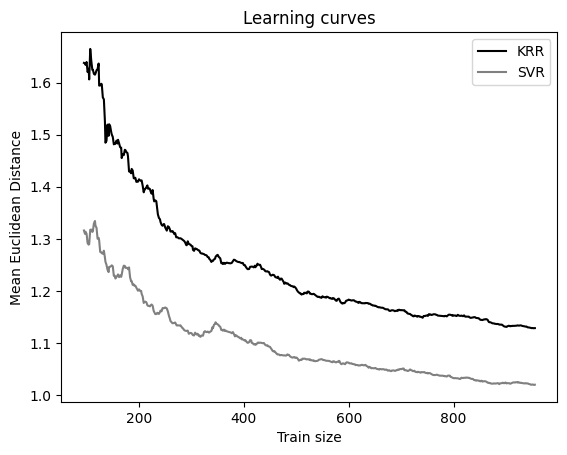

In [28]:
plt.figure()

svr = joblib.load('./results/ml_cup/SVM/rbf_classifier_2.z')
kr = joblib.load('./results/ml_cup/KRR/poly_krr_2.z')
train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    x_mlcup_tr,
    y2_mlcup_tr,
    train_sizes = np.linspace(0.1, 1, 500),
    scoring = mean_euclidean_distance,
    cv = 5,
)
train_sizes_abs, train_scores_kr, test_scores_kr = learning_curve(
    kr,
    x_mlcup_tr,
    y2_mlcup_tr,
    train_sizes = np.linspace(0.1, 1, 500),
    scoring = mean_euclidean_distance,
    cv = 5,
)

plt.plot(train_sizes, -test_scores_kr.mean(1), color="black", label="KRR")
plt.plot(train_sizes, -test_scores_svr.mean(1), color="grey", label="SVR")
plt.xlabel("Train size")
plt.ylabel("Mean Euclidean Distance")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()